<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_61_Softmax_Regression_and_Multinomial_Logistic_Regression/Lecture_61_Softmax_Regression_and_Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading and Preparation:**

- The notebook starts by loading the Iris dataset and preparing it for machine learning by encoding the 'species' column into numerical labels and selecting relevant features.

**Data Splitting:**

- The dataset is then split into training and testing sets to evaluate the performance of the machine learning model.

**Model Initialization and Training:**

- A Logistic Regression classifier is initialized with a multinomial setting and trained using the prepared training data.

**Model Evaluation:**

- The trained model's performance is evaluated using the test set, calculating and displaying the accuracy score and a confusion matrix to understand the prediction results.

**Prediction and Visualization:**

- Finally, the notebook demonstrates how to make predictions on new data points and visualizes the decision regions of the trained classifier to show how it separates the different species based on the selected features.

In [22]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Load the iris dataset from seaborn
df = sns.load_dataset('iris')

In [24]:
# Display the first 5 rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# Initialize a LabelEncoder to transform categorical species names into numerical labels
encoder = LabelEncoder()
# Apply the encoder to the 'species' column, replacing original names with numerical labels
df['species'] = encoder.fit_transform(df['species'])

In [26]:
# Display a random sample of 5 rows from the dataframe
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,1
1,4.9,3.0,1.4,0.2,0
143,6.8,3.2,5.9,2.3,2
19,5.1,3.8,1.5,0.3,0
78,6.0,2.9,4.5,1.5,1


In [27]:
# Select only the 'sepal_length', 'petal_length', and 'species' columns
df = df[['sepal_length','petal_length','species']]

In [28]:
# Display the first 5 rows of the modified dataframe
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [29]:
# Separate features (X) and target variable (y)
# X contains the first two columns (sepal_length and petal_length)
X = df.iloc[:,0:2]
# y contains the last column (species)
y = df.iloc[:,-1]

In [30]:
# Split the data into training and testing sets
# 80% of data for training, 20% for testing
# random_state ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
# Initialize a Logistic Regression classifier with multinomial setting for multi-class classification
clf = LogisticRegression(multi_class='multinomial')

In [32]:
# Train the classifier using the training data
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [33]:
# Predict the species for the test set
y_pred = clf.predict(X_test)

In [34]:
# Calculate and print the accuracy of the model on the test set
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [35]:
# Generate and display the confusion matrix
# This table shows the number of correct and incorrect predictions for each class
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [36]:
# Define a new data point for prediction
query = np.array([[3.4,2.7]])
# Predict the probability of each species for the new data point
clf.predict_proba(query)

array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [37]:
# Predict the species class for the new data point
clf.predict(query)

array([0])

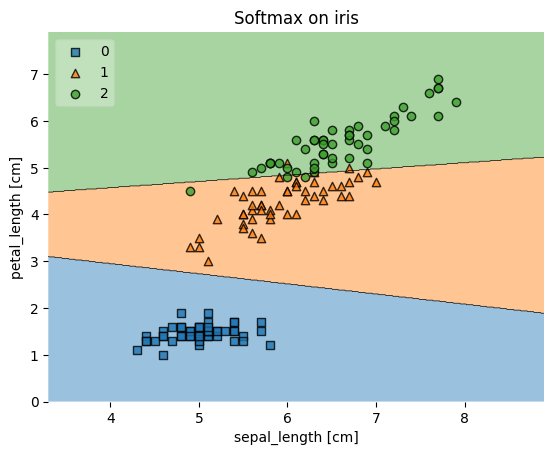

In [38]:
# Import the plotting function for decision regions
from mlxtend.plotting import plot_decision_regions

# Plot the decision regions of the trained classifier
# X.values and y.values are used as input features and target variables
# clf is the trained classifier
# legend=2 displays the legend
plot_decision_regions(X.values, y.values, clf=clf, legend=2)

# Adding axes annotations for clarity
plt.xlabel('sepal_length [cm]')
plt.ylabel('petal_length [cm]')
plt.title('Softmax on iris')
# Display the plot
plt.show()